In [53]:
import pandas as pd
import numpy as np
import sidetable

import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
import math 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import LabelEncoder # para realizar el Label Encoding 
from sklearn.preprocessing import OneHotEncoder  # para realizar el One-Hot Encoding
from sklearn.preprocessing import OrdinalEncoder

import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None


Usando el mismo dataset que usatéis ayer, los objetivos de los ejercicios de hoy son:

> Estandarizar las variables numéricas de vuestro set de datos


In [36]:
#Estandarizamos con StandardScaler

In [37]:
df= pd.read_csv('datos/books_eda.csv', index_col=0)
df.head()

,author,user_rating,reviews,price,year,genre
38,Stephenie Meyer,4.6,9769,13,2009,Fiction
42,Jeff Kinney,4.8,4505,0,2011,Fiction
46,Suzanne Collins,4.7,22614,11,2010,Fiction
47,Suzanne Collins,4.7,22614,11,2011,Fiction
48,Suzanne Collins,4.7,22614,11,2012,Fiction


In [38]:
numericas=df.select_dtypes(include=np.number)

In [39]:
scaler=StandardScaler()

In [40]:
scaler.fit(numericas)

StandardScaler()

In [41]:
X_estandar=scaler.transform(numericas)

In [42]:
num_estand=pd.DataFrame(X_estandar, columns=numericas.columns)
num_estand

,user_rating,reviews,price,year
0,-0.806534,0.025759,0.140900,-1.347319
1,0.841223,-0.667585,-1.710289,-0.657318
2,0.017345,1.717631,-0.143898,-1.002318
3,0.017345,1.717631,-0.143898,-0.657318
4,0.017345,1.717631,-0.143898,-0.312317
...,...,...,...,...
90,0.017345,-0.760312,-0.143898,-1.347319
91,0.841223,-0.760971,-0.001499,-1.002318
92,0.017345,0.276939,-0.428696,-1.347319
93,0.017345,-1.014258,0.283299,0.722686


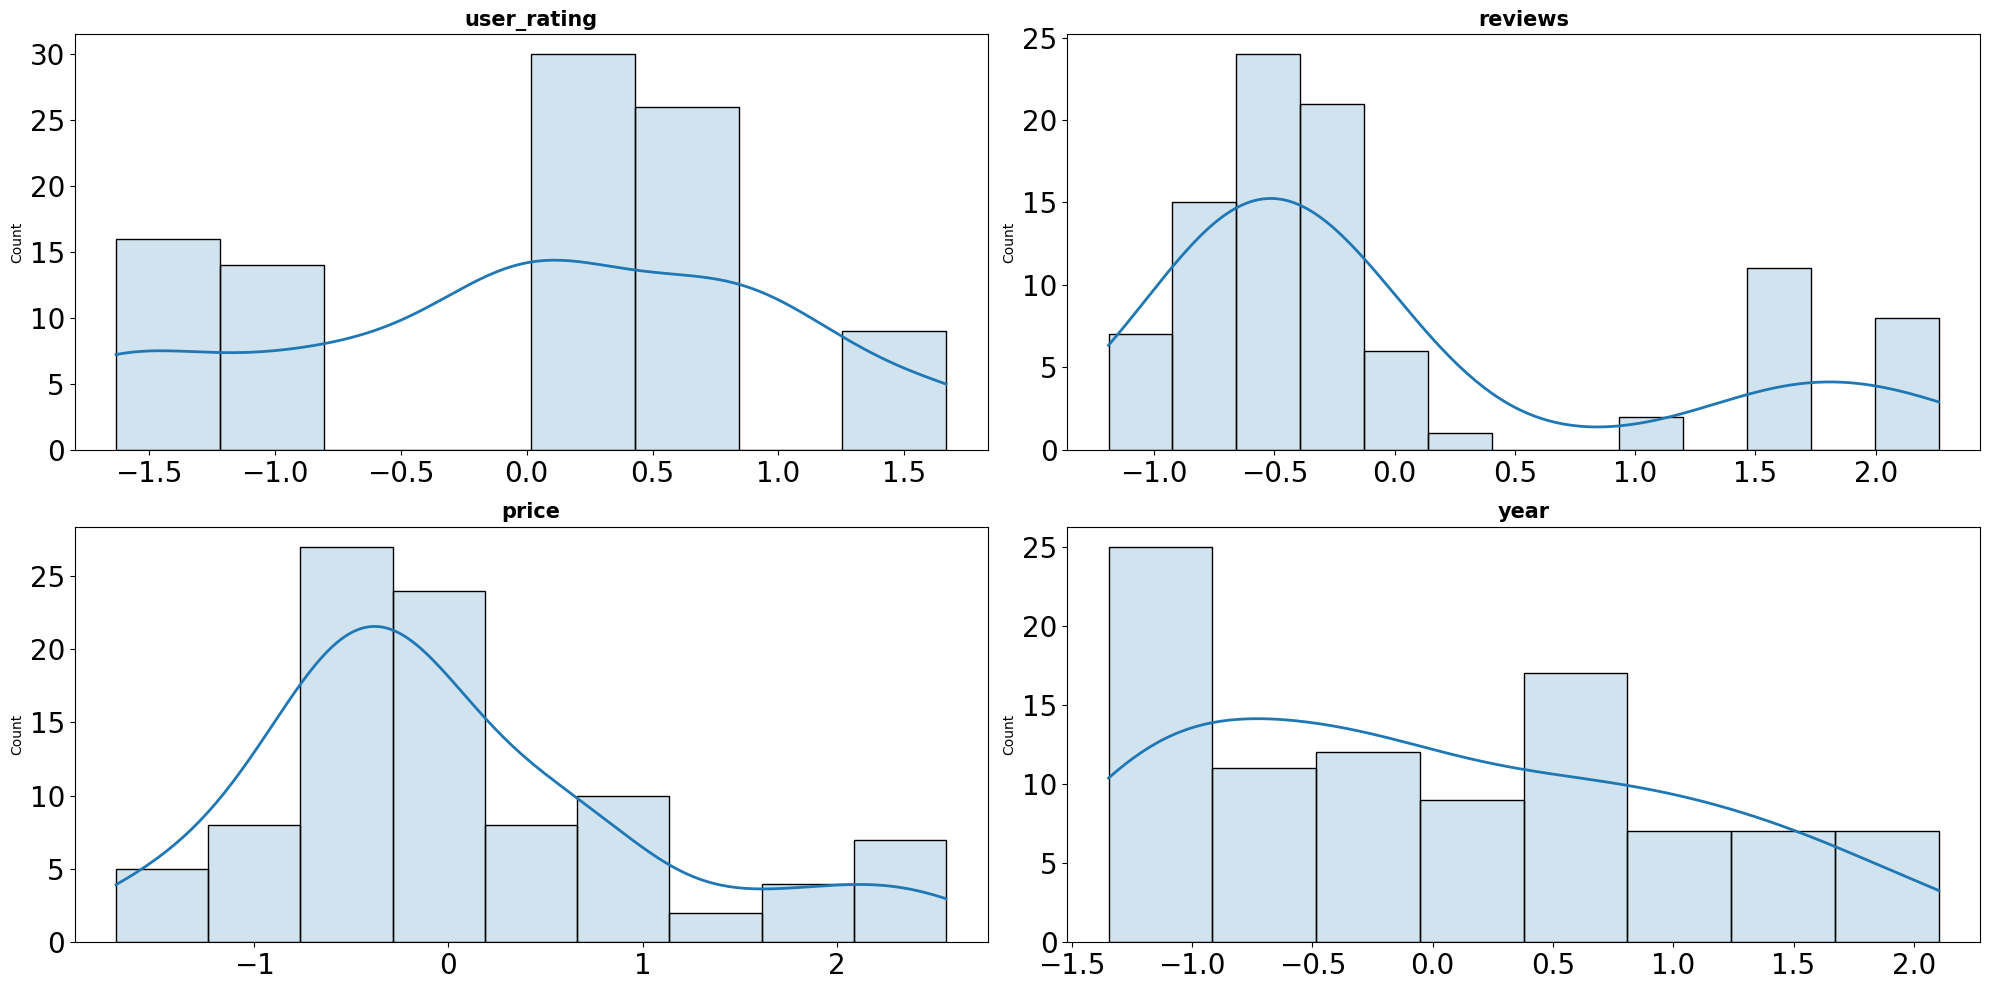

In [43]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (20, 10))

columnas_estandar = num_estand.columns
axes = axes.flat

for i, colum in enumerate(columnas_estandar): 
    sns.histplot(
        data = num_estand,
        x = colum,
        kde = True,  
        line_kws = {"linewidth": 2}, 
        alpha = 0.2, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
plt.tight_layout()

In [44]:
df.drop(["user_rating", "reviews","price"], axis = 1, inplace=True)

In [45]:
df = pd.concat([df, num_estand], axis = 1)

In [46]:
df.head()

,author,year,genre,user_rating,reviews,price,year
38,Stephenie Meyer,2009.0,Fiction,-1.630412,-0.130849,-0.143898,0.032684
42,Jeff Kinney,2011.0,Fiction,-1.630412,-0.130849,-0.143898,1.412688
46,Suzanne Collins,2010.0,Fiction,0.017345,-0.593299,0.710497,-0.657318
47,Suzanne Collins,2011.0,Fiction,0.017345,-0.593299,0.710497,-0.312317
48,Suzanne Collins,2012.0,Fiction,0.017345,-0.593299,0.710497,0.032684


In [47]:
# Dejamos en duda el estandarizar el año o no. Nosotras creemos que no hace falta porque no queremos operar con él, 
# pero lo dejamos en duda.

>Codificar las variables categóricas. Recordad que tendréis que tener en cuenta si vuestras variables tienen orden o no.


>EXPLICACIÓN DE LAS COLUMNAS QUE CODIFICAMOS

- author: nombre del autor. No tiene orden -GET DUMMIES

- year: año en el que se publica -> DUDA. NO SABEMOS SI CASTEARLA A CATEGORY

- genre:Género del libro. Dicotómica (ficción/no) No tiene orden - GET DUMMIES

In [48]:
lista_columnas = ["author", "genre"]

df_encoded = pd.DataFrame()

for columna in lista_columnas:
    df_dummies = pd.get_dummies(df[columna], prefix_sep = "_", prefix = columna, dtype = int)

    df_encoded = pd.concat([df_encoded, df_dummies], axis = 1)

In [49]:
df_encoded.shape

(180, 12)

In [50]:
df_encoded.head()

,author_American Psychological Association,author_Dr. Seuss,author_Gallup,author_Gary Chapman,author_Jeff Kinney,author_Rick Riordan,author_Rob Elliott,author_Stephen R. Covey,author_Stephenie Meyer,author_Suzanne Collins,genre_Fiction,genre_Non Fiction
38,0,0,0,0,0,0,0,0,1,0,1,0
42,0,0,0,0,1,0,0,0,0,0,1,0
46,0,0,0,0,0,0,0,0,0,1,1,0
47,0,0,0,0,0,0,0,0,0,1,1,0
48,0,0,0,0,0,0,0,0,0,1,1,0


In [51]:
df_final = pd.concat([df, df_encoded], axis = 1)
df_final.head()

,author,year,genre,user_rating,reviews,price,year,author_American Psychological Association,author_Dr. Seuss,author_Gallup,author_Gary Chapman,author_Jeff Kinney,author_Rick Riordan,author_Rob Elliott,author_Stephen R. Covey,author_Stephenie Meyer,author_Suzanne Collins,genre_Fiction,genre_Non Fiction
38,Stephenie Meyer,2009.0,Fiction,-1.630412,-0.130849,-0.143898,0.032684,0,0,0,0,0,0,0,0,1,0,1,0
42,Jeff Kinney,2011.0,Fiction,-1.630412,-0.130849,-0.143898,1.412688,0,0,0,0,1,0,0,0,0,0,1,0
46,Suzanne Collins,2010.0,Fiction,0.017345,-0.593299,0.710497,-0.657318,0,0,0,0,0,0,0,0,0,1,1,0
47,Suzanne Collins,2011.0,Fiction,0.017345,-0.593299,0.710497,-0.312317,0,0,0,0,0,0,0,0,0,1,1,0
48,Suzanne Collins,2012.0,Fiction,0.017345,-0.593299,0.710497,0.032684,0,0,0,0,0,0,0,0,0,1,1,0


In [52]:
df_final = df_final.drop(lista_columnas, axis = 1)
df_final.head()

,year,user_rating,reviews,price,year,author_American Psychological Association,author_Dr. Seuss,author_Gallup,author_Gary Chapman,author_Jeff Kinney,author_Rick Riordan,author_Rob Elliott,author_Stephen R. Covey,author_Stephenie Meyer,author_Suzanne Collins,genre_Fiction,genre_Non Fiction
38,2009.0,-1.630412,-0.130849,-0.143898,0.032684,0,0,0,0,0,0,0,0,1,0,1,0
42,2011.0,-1.630412,-0.130849,-0.143898,1.412688,0,0,0,0,1,0,0,0,0,0,1,0
46,2010.0,0.017345,-0.593299,0.710497,-0.657318,0,0,0,0,0,0,0,0,0,1,1,0
47,2011.0,0.017345,-0.593299,0.710497,-0.312317,0,0,0,0,0,0,0,0,0,1,1,0
48,2012.0,0.017345,-0.593299,0.710497,0.032684,0,0,0,0,0,0,0,0,0,1,1,0


In [60]:
#Cambiamos el nombre de las columnas

nuevas_col={col:col.replace(" ","_").lower() for col in df.columns}
df_final=df_final.rename(columns=nuevas_col)

In [61]:
df_final.head()

,year,user_rating,reviews,price,year,author_American Psychological Association,author_Dr. Seuss,author_Gallup,author_Gary Chapman,author_Jeff Kinney,author_Rick Riordan,author_Rob Elliott,author_Stephen R. Covey,author_Stephenie Meyer,author_Suzanne Collins,genre_Fiction,genre_Non Fiction
38,2009.0,-1.630412,-0.130849,-0.143898,0.032684,0,0,0,0,0,0,0,0,1,0,1,0
42,2011.0,-1.630412,-0.130849,-0.143898,1.412688,0,0,0,0,1,0,0,0,0,0,1,0
46,2010.0,0.017345,-0.593299,0.710497,-0.657318,0,0,0,0,0,0,0,0,0,1,1,0
47,2011.0,0.017345,-0.593299,0.710497,-0.312317,0,0,0,0,0,0,0,0,0,1,1,0
48,2012.0,0.017345,-0.593299,0.710497,0.032684,0,0,0,0,0,0,0,0,0,1,1,0


>Chequear si vuestros datos están balanceados. En caso de que no lo estén utilizad algunas de las herramientas aprendidas en la lección para balancearlos.


In [62]:
df_final.columns

Index(['year', 'user_rating', 'reviews', 'price', 'year',
       'author_American Psychological Association', 'author_Dr. Seuss',
       'author_Gallup', 'author_Gary Chapman', 'author_Jeff Kinney',
       'author_Rick Riordan', 'author_Rob Elliott', 'author_Stephen R. Covey',
       'author_Stephenie Meyer', 'author_Suzanne Collins', 'genre_Fiction',
       'genre_Non Fiction'],
      dtype='object')

In [65]:
freq_var_resp= df.stb.freq(['genre'])
freq_var_resp

,genre,count,percent,cumulative_count,cumulative_percent
0,Fiction,50,52.631579,50,52.631579
1,Non Fiction,45,47.368421,95,100.000000


In [66]:
#Nuestros datos no están balanceados.

>Guardad el dataframe con los cambios que habéis aplicado para utilizarlo en la siguiente lección.

In [67]:
df_final.to_csv('datos/books_prepr_datos.csv')